In [2]:
# Se descargan las librerias 

import yfinance as yf
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting, objective_functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pypfopt import black_litterman 
from pypfopt import BlackLittermanModel 
from sklearn import covariance

In [3]:
# se crea la lista de acciones a importar a partir del modelo markowitz implementado anteriormente 
acciones = ["AAPL",
            "AMZN",
            "BBVA.MC",
            "BIMBOA.MX",
            "GOOG",
            "GRUMAB.MX",
            "IBE.MC",
            "META",
            "MSFT",
            "NVDA",
            "PETR4.SA",
            "SHOP",
            "TSLA",
            "WALMEX.MX",]


datos = yf.download(acciones, start="2018-05-01", end = "2024-05-01", interval = '1mo')['Adj Close']

datos

[*********************100%%**********************]  14 of 14 completed


Ticker,AAPL,AMZN,BBVA.MC,BIMBOA.MX,GOOG,GRUMAB.MX,IBE.MC,META,MSFT,NVDA,PETR4.SA,SHOP,TSLA,WALMEX.MX
Date,,,,,,,,,,,,,,
2018-05-01,44.240311,81.481003,4.205687,34.504181,54.249500,184.504608,4.707414,191.576736,92.356743,62.419552,6.450393,14.809000,18.982000,46.172585
2018-06-01,43.992634,84.989998,4.374951,35.366848,55.782501,214.277664,5.135360,194.114044,92.541199,58.671391,5.853743,14.589000,22.863333,48.293980
2018-07-01,45.223690,88.872002,4.527650,36.253529,60.862999,212.813278,5.155518,172.397079,99.551468,60.642776,6.715288,13.821000,19.875999,50.203220
2018-08-01,54.097801,100.635498,3.867878,36.335800,60.909500,214.438751,5.115341,175.543747,105.416817,69.514061,6.558644,14.567000,20.110666,48.782814
2018-09-01,53.836777,100.150002,3.954310,36.482059,59.673500,211.949280,5.048432,164.285690,107.744316,69.636353,7.199779,16.445999,17.651333,52.697029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,192.024185,151.940002,7.934484,84.748314,140.929993,310.750000,11.670105,353.584839,374.670074,495.153229,34.717766,77.900002,248.479996,71.389999
2024-01-01,183.915543,155.199997,8.368536,77.246719,141.800003,322.000000,10.986810,389.726501,396.131622,615.241150,37.999355,80.070000,187.289993,71.089996
2024-02-01,180.275131,176.759995,8.860462,70.386696,139.779999,303.609985,10.620000,489.610535,412.133118,791.082886,37.421345,76.370003,201.880005,68.080002


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2018-05-01 to 2024-04-01
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AAPL       72 non-null     float64
 1   AMZN       72 non-null     float64
 2   BBVA.MC    72 non-null     float64
 3   BIMBOA.MX  72 non-null     float64
 4   GOOG       72 non-null     float64
 5   GRUMAB.MX  72 non-null     float64
 6   IBE.MC     72 non-null     float64
 7   META       72 non-null     float64
 8   MSFT       72 non-null     float64
 9   NVDA       72 non-null     float64
 10  PETR4.SA   72 non-null     float64
 11  SHOP       72 non-null     float64
 12  TSLA       72 non-null     float64
 13  WALMEX.MX  72 non-null     float64
dtypes: float64(14)
memory usage: 8.4 KB


In [22]:
# Se importa los precios del mercado en este caso un ETF SPY que sigue el comportamiento del SP&500

market_prices = yf.download("SPY", start="2018-05-01", end = "2024-05-01")['Adj Close']
market_prices

[*********************100%%**********************]  1 of 1 completed


Date
2018-05-01    239.859207
2018-05-02    238.247925
2018-05-03    237.722900
2018-05-04    240.800568
2018-05-07    241.615280
                 ...    
2024-04-24    505.410004
2024-04-25    503.489990
2024-04-26    508.260010
2024-04-29    510.059998
2024-04-30    501.980011
Name: Adj Close, Length: 1510, dtype: float64

In [7]:
market_prices.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 72 entries, 2018-05-01 to 2024-04-01
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
72 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


In [11]:
# Se crea el diccionario para el cambio de las tasas 

currency_suffix_to_exchange_rate = {
    "MC": "EURUSD=X",
    "MX": "MXNUSD=X",
    "SA": "BRLUSD=X",
}

In [12]:
# se decarga las tasas de cambio para cada moneda en cada periodo de tiempo 

exchange_rates_data = yf.download(list(currency_suffix_to_exchange_rate.values()), 
                                  start='2018-05-01', end='2024-05-01', interval='1mo')['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [13]:
exchange_rates_data

Ticker,BRLUSD=X,EURUSD=X,MXNUSD=X
Date,,,
2018-05-01,0.268666,1.166725,0.050568
2018-06-01,0.259101,1.170494,0.050686
2018-07-01,0.268233,1.170741,0.053965
2018-08-01,0.241045,1.166466,0.052356
2018-09-01,0.247036,1.162304,0.053468
...,...,...,...
2023-12-01,0.206656,1.105583,0.058975
2024-01-01,0.202008,1.084340,0.058300
2024-02-01,0.201317,1.083882,0.058523


In [14]:
# Añadir una columna de unos para USD
exchange_rates_data['USD'] = 1.0
exchange_rates_data

Ticker,BRLUSD=X,EURUSD=X,MXNUSD=X,USD
Date,,,,
2018-05-01,0.268666,1.166725,0.050568,1.0
2018-06-01,0.259101,1.170494,0.050686,1.0
2018-07-01,0.268233,1.170741,0.053965,1.0
2018-08-01,0.241045,1.166466,0.052356,1.0
2018-09-01,0.247036,1.162304,0.053468,1.0
...,...,...,...,...
2023-12-01,0.206656,1.105583,0.058975,1.0
2024-01-01,0.202008,1.084340,0.058300,1.0
2024-02-01,0.201317,1.083882,0.058523,1.0


In [15]:
# se crea el bucle for para cambiar las tasas 
for ticker in acciones:
    suffix = ticker.split('.')[-1] if '.' in ticker else "USD"
    exchange_rate = exchange_rates_data[currency_suffix_to_exchange_rate.get(suffix, 'USD')]

    # Aplicar la conversión
    datos[ticker] = datos[ticker] * exchange_rate

In [16]:
datos

Ticker,AAPL,AMZN,BBVA.MC,BIMBOA.MX,GOOG,GRUMAB.MX,IBE.MC,META,MSFT,NVDA,PETR4.SA,SHOP,TSLA,WALMEX.MX
Date,,,,,,,,,,,,,,
2018-05-01,44.240311,81.481003,4.906880,1.744821,54.249500,9.330101,5.492257,191.576736,92.356743,62.419552,1.732998,14.809000,18.982000,2.334873
2018-06-01,43.992634,84.989998,5.120855,1.792605,55.782501,10.860885,6.010909,194.114044,92.541199,58.671391,1.516710,14.589000,22.863333,2.447830
2018-07-01,45.223690,88.872002,5.300705,1.956416,60.862999,11.484437,6.035775,172.397079,99.551468,60.642776,1.801263,13.821000,19.875999,2.709209
2018-08-01,54.097801,100.635498,4.511750,1.902414,60.909500,11.227254,5.966873,175.543747,105.416817,69.514061,1.580929,14.567000,20.110666,2.554095
2018-09-01,53.836777,100.150002,4.596111,1.950610,59.673500,11.332428,5.867813,164.285690,107.744316,69.636353,1.778602,16.445999,17.651333,2.817586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,192.024185,151.940002,8.772232,4.998073,140.929993,18.326631,12.902272,353.584839,374.670074,495.153229,7.174650,77.900002,248.479996,4.210260
2024-01-01,183.915543,155.199997,9.074338,4.503470,141.800003,18.772544,11.913437,389.726501,396.131622,615.241150,7.676172,80.070000,187.289993,4.144534
2024-02-01,180.275131,176.759995,9.603692,4.119241,139.779999,17.768167,11.510823,489.610535,412.133118,791.082886,7.533538,76.370003,201.880005,3.984246


In [8]:
# Se crea una funcion para obtener la capitalizaciones de cada accion
 
def obtener_capitalizaciones(acciones):
    mcaps = {}
    for accion in acciones:
        try:
            ticker = yf.Ticker(accion)
            info = ticker.info
            mcaps[accion] = info['marketCap']
        except Exception as e:
            print(f"No se pudo obtener la capitalización de mercado para {accion}: {str(e)}")
    return mcaps

mcaps = obtener_capitalizaciones(acciones)
mcaps

{'AAPL': 2911485558784,
 'AMZN': 1922098921472,
 'BBVA.MC': 57748168704,
 'BIMBOA.MX': 306717851648,
 'GOOG': 2182652493824,
 'GRUMAB.MX': 118632472576,
 'IBE.MC': 77486473216,
 'META': 1197013860352,
 'MSFT': 3123130925056,
 'NVDA': 2274826125312,
 'PETR4.SA': 487632109568,
 'SHOP': 75410636800,
 'TSLA': 565955461120,
 'WALMEX.MX': 1186173812736}

In [28]:
# Se hace el mismo proceso de cambio de tasas para cambiar las capitalizaciones a dolares 

from datetime import datetime

# Supongamos que la fecha de conversión es la última disponible
conversion_date = exchange_rates_data.index[-1]

# Crear un nuevo diccionario para almacenar las capitalizaciones convertidas
capitalizaciones_en_dolares = {}

for ticker, capitalizacion in mcaps.items():
    suffix = ticker.split('.')[-1] if '.' in ticker else "USD"
    exchange_rate = exchange_rates_data.at[conversion_date, currency_suffix_to_exchange_rate.get(suffix, 'USD')]

    # Aplicar la conversión
    capitalizacion_en_dolares = capitalizacion * exchange_rate
    capitalizaciones_en_dolares[ticker] = capitalizacion_en_dolares


capitalizaciones_en_dolares



{'AAPL': 2911485558784.0,
 'AMZN': 1922098921472.0,
 'BBVA.MC': 61881214262.63086,
 'BIMBOA.MX': 18029965254.240723,
 'GOOG': 2182652493824.0,
 'GRUMAB.MX': 6973638303.3377075,
 'IBE.MC': 83032192347.30078,
 'META': 1197013860352.0,
 'MSFT': 3123130925056.0,
 'NVDA': 2274826125312.0,
 'PETR4.SA': 95296480531.38867,
 'SHOP': 75410636800.0,
 'TSLA': 565955461120.0,
 'WALMEX.MX': 69727511829.55078}

In [30]:
# Diccionario original con valores numpy.float64 se cabia a valores enteros 
capitalizacion_en_dolares = {
    'AAPL': 2911485558784.0,
    'AMZN': 1922098921472.0,
    'BBVA.MC': 61881214262.63086,
    'BIMBOA.MX': 18029965254.240723,
    'GOOG': 2182652493824.0,
    'GRUMAB.MX': 6973638303.3377075,
    'IBE.MC': 83032192347.30078,
    'META': 1197013860352.0,
    'MSFT': 3123130925056.0,
    'NVDA': 2274826125312.0,
    'PETR4.SA': 95296480531.38867,
    'SHOP': 75410636800.0,
    'TSLA': 565955461120.0,
    'WALMEX.MX': 69727511829.55078
}

# Convertir los valores a enteros
capitalizacion_en_dolares_entero = {ticker: int(valor) for ticker, valor in capitalizacion_en_dolares.items()}

capitalizacion_en_dolares_entero

{'AAPL': 2911485558784,
 'AMZN': 1922098921472,
 'BBVA.MC': 61881214262,
 'BIMBOA.MX': 18029965254,
 'GOOG': 2182652493824,
 'GRUMAB.MX': 6973638303,
 'IBE.MC': 83032192347,
 'META': 1197013860352,
 'MSFT': 3123130925056,
 'NVDA': 2274826125312,
 'PETR4.SA': 95296480531,
 'SHOP': 75410636800,
 'TSLA': 565955461120,
 'WALMEX.MX': 69727511829}

In [19]:
# Se calcula la matriz de covarianza utilizando un metodo de machine learning que proporciona datos mas exactos y confiables 

S = risk_models.CovarianceShrinkage(datos, frequency = 12).ledoit_wolf()
S

Ticker,AAPL,AMZN,BBVA.MC,BIMBOA.MX,GOOG,GRUMAB.MX,IBE.MC,META,MSFT,NVDA,PETR4.SA,SHOP,TSLA,WALMEX.MX
Ticker,,,,,,,,,,,,,,
AAPL,0.102422,0.057214,0.013166,0.021011,0.035156,0.027191,0.016938,0.044721,0.038625,0.083078,0.044389,0.078562,0.121194,0.021106
AMZN,0.057214,0.114589,0.011877,0.016420,0.046503,0.030152,0.010633,0.059087,0.042290,0.093389,0.026176,0.101554,0.106030,0.022138
BBVA.MC,0.013166,0.011877,0.178580,0.051276,0.027573,0.039651,0.034642,0.036565,0.018681,0.031878,0.071662,0.067600,0.042867,0.043233
BIMBOA.MX,0.021011,0.016420,0.051276,0.088041,0.016770,0.029081,0.018503,0.014427,0.014113,0.018279,0.020878,0.045159,0.026071,0.033885
GOOG,0.035156,0.046503,0.027573,0.016770,0.079012,0.024504,0.012445,0.041512,0.030968,0.063661,0.023759,0.073198,0.068265,0.027318
GRUMAB.MX,0.027191,0.030152,0.039651,0.029081,0.024504,0.084490,0.022005,0.020819,0.016346,0.029469,0.038227,0.054350,0.040440,0.026819
IBE.MC,0.016938,0.010633,0.034642,0.018503,0.012445,0.022005,0.066597,0.014415,0.016309,0.015201,0.008173,0.040174,0.033366,0.016399
META,0.044721,0.059087,0.036565,0.014427,0.041512,0.020819,0.014415,0.163856,0.039788,0.096760,0.028461,0.088075,0.075760,0.012637
MSFT,0.038625,0.042290,0.018681,0.014113,0.030968,0.016346,0.016309,0.039788,0.060840,0.061138,0.008427,0.069439,0.061425,0.015482


In [23]:
# Se calcula la aversion al riesgo del mercado

delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

3.066090941282825

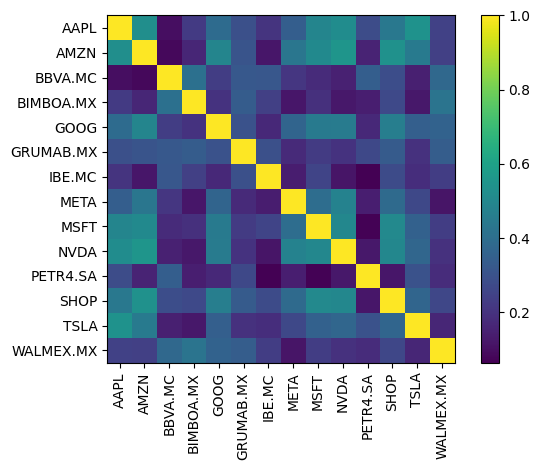

In [24]:
# Se grafica la correlacion de los activos 

plotting.plot_covariance(S, plot_correlation=True);

In [31]:
# Se calcula los rendimientos iniciales antes de introducir los views

prior = black_litterman.market_implied_prior_returns(capitalizacion_en_dolares_entero, delta, S)
prior

Ticker
AAPL         0.215696
AMZN         0.225438
BBVA.MC      0.093629
BIMBOA.MX    0.074917
GOOG         0.168593
GRUMAB.MX    0.098086
IBE.MC       0.068696
META         0.215866
MSFT         0.163517
NVDA         0.341476
PETR4.SA     0.115525
SHOP         0.302094
TSLA         0.354510
WALMEX.MX    0.087356
dtype: float64

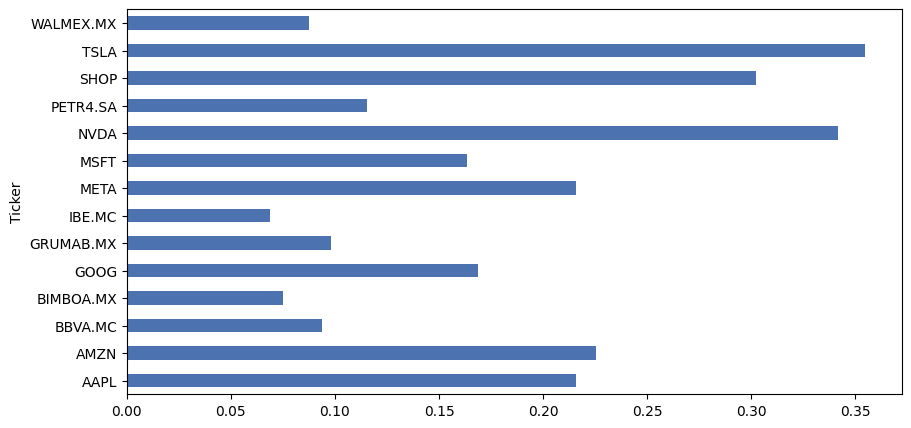

In [32]:
# Se grafica los rendimietos esperados por el modelo BL

prior.plot.barh(figsize=(10,5));

In [41]:
# Se introducen los views del inversionista

viewdict = {'AAPL': 0.18,
            'AMZN': 0.13,
            'BBVA.MC': 0.093629,
            'BIMBOA.MX': 0.074917,
            'GOOG': 0.23,
            'GRUMAB.MX': 0.098086,
            'IBE.MC': 0.068696,
            'META': 0.15,
            'MSFT': 0.27,
            'NVDA': 0.30,
            'PETR4.SA': 0.115525,
            'SHOP': 0.16,
            'TSLA': 0.12,
            'WALMEX.MX': 0.087356}

In [42]:
# Se introduce el nivel de confianza de los views 

confidences = [
    0.7,
    0.8,
    0.9,
    0.9,
    0.8,
    0.9,
    0.9,
    0.6,
    0.7, 
    0.5,
    0.9,
    0.7,
    0.7,
    0.9
]

In [43]:
# Se calcula el rendimieento final (posterior) calculado por el modelo "idzorek"

bl = BlackLittermanModel(S, pi=prior, absolute_views=viewdict, omega="idzorek", view_confidences=confidences)
ret_bl = bl.bl_returns()
ret_bl

Ticker
AAPL         0.185549
AMZN         0.156797
BBVA.MC      0.095205
BIMBOA.MX    0.074436
GOOG         0.207599
GRUMAB.MX    0.096698
IBE.MC       0.068964
META         0.178058
MSFT         0.216188
NVDA         0.307263
PETR4.SA     0.110548
SHOP         0.215993
TSLA         0.197097
WALMEX.MX    0.088699
dtype: float64

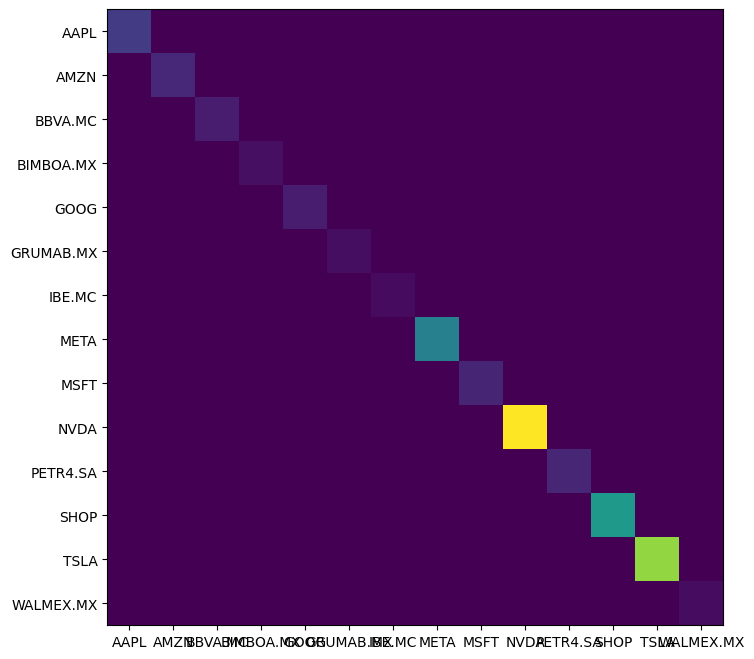

In [44]:
# Se observa el nivel de incertidumbre calculado atomaticamente por el modelo 

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(bl.omega)

ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [45]:
# Se observa en datos numericos el nivel de incertidumbre
np.diag(bl.omega)

array([0.00219475, 0.00143236, 0.00099211, 0.00048912, 0.00098765,
       0.00046939, 0.00036998, 0.00546187, 0.00130371, 0.01251663,
       0.00136602, 0.00670024, 0.01049282, 0.0004055 ])

In [57]:
# Se crean intervaos de rendimientos esperados con el objetivo de crear un nivel de incetidumbre mas confiable y ajustado al inversionista

intervals = [
    (0.15, 0.23),
    (0.1, 0.18),
    (0.09, 0.1),
    (0.08, 0.09),
    (0.18, 0.29),
    (0.09, 0.1),
    (0.06, 0.07),
    (0.13, 0.22),
    (0.2, 0.25),
    (0.2, 0.4),
    (0.11, 0.12),
    (0.13, 0.18),
    (0.1, 0.3),
    (0.08, 0.09)
]

In [58]:
# se agregan las varianzas a al vector omega

variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)


omega = np.diag(variances)
variances

[0.0016000000000000007,
 0.0015999999999999994,
 2.5000000000000045e-05,
 2.4999999999999974e-05,
 0.0030249999999999995,
 2.5000000000000045e-05,
 2.5000000000000045e-05,
 0.002025,
 0.0006249999999999997,
 0.010000000000000002,
 2.4999999999999974e-05,
 0.0006249999999999997,
 0.009999999999999998,
 2.4999999999999974e-05]

In [59]:
# se calcula el rendimiento final esperado posterior 

bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,
                        absolute_views=viewdict, omega=omega)

In [60]:
# Se observa los los rendimientos esperados para cada activo 

ret_bl = bl.bl_returns()
ret_bl

Ticker
AAPL         0.182515
AMZN         0.152887
BBVA.MC      0.093662
BIMBOA.MX    0.074854
GOOG         0.181005
GRUMAB.MX    0.097934
IBE.MC       0.068617
META         0.161437
MSFT         0.231695
NVDA         0.296300
PETR4.SA     0.115425
SHOP         0.169352
TSLA         0.193995
WALMEX.MX    0.087465
dtype: float64

In [61]:
# Se compara los datos esperados arrojados por el modelo contra los del inversionsta y la combiancion de ambos con la metodo bayesiano 
# para calcular el rendimiento final posterior 

rets_df = pd.DataFrame([prior, pd.Series(viewdict), ret_bl ], 
             index=["Prior", "Views", "Posterior"]).T
rets_df

,Prior,Views,Posterior
AAPL,0.215696,0.180000,0.182515
AMZN,0.225438,0.130000,0.152887
BBVA.MC,0.093629,0.093629,0.093662
BIMBOA.MX,0.074917,0.074917,0.074854
GOOG,0.168593,0.230000,0.181005
GRUMAB.MX,0.098086,0.098086,0.097934
IBE.MC,0.068696,0.068696,0.068617
META,0.215866,0.150000,0.161437
MSFT,0.163517,0.270000,0.231695
NVDA,0.341476,0.300000,0.296300


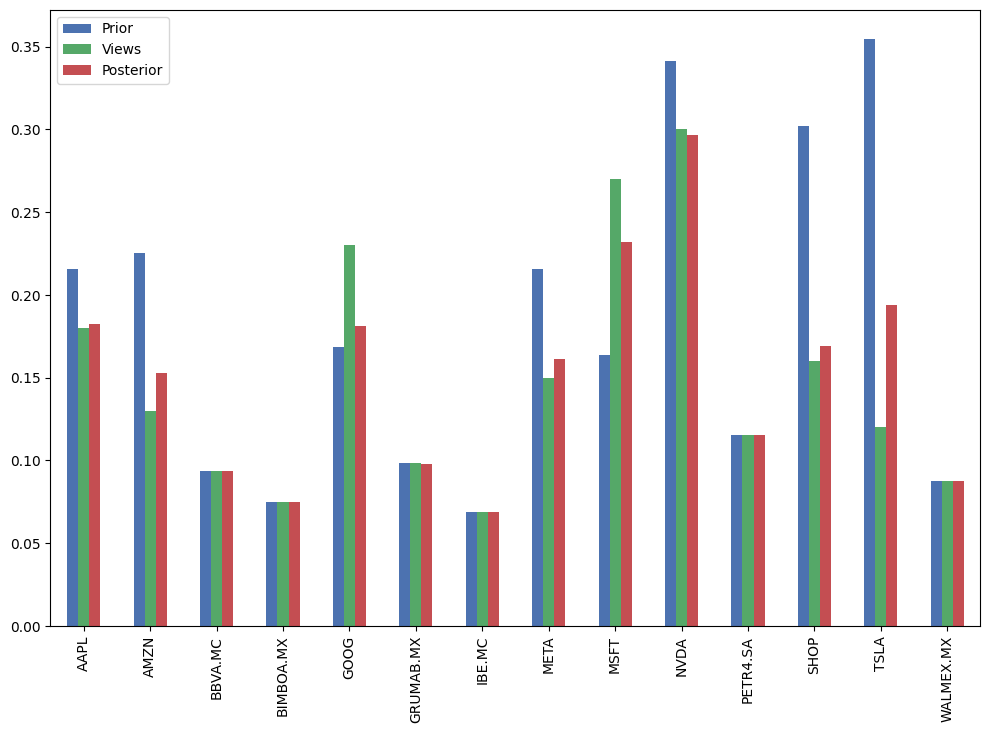

In [62]:
# se grafica la comparacion 

rets_df.plot.bar(figsize=(12,8));

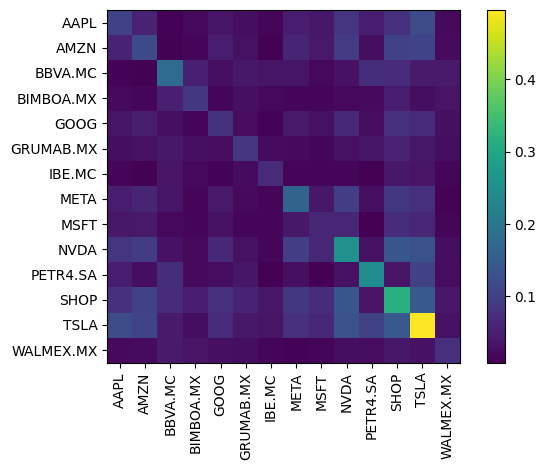

In [63]:
# se grafica el nivel de incertidumbre creado manulamente 

S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

In [66]:
#Se calcula la frontera eficinete mediante un preceso de machine learning para evitar la concentracion de pesos en los activos 

ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe(risk_free_rate = 0.04357)
weights1 = ef.clean_weights()
rendimiento_esperado1, volatilidad1, razon_sharpe1 = ef.portfolio_performance(verbose=True)
weights1

c:\Users\Alvaro\AppData\Local\Programs\Python\Python311\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Expected annual return: 19.6%
Annual volatility: 25.9%
Sharpe Ratio: 0.59


c:\Users\Alvaro\AppData\Local\Programs\Python\Python311\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


OrderedDict([('AAPL', 0.10459),
             ('AMZN', 0.06597),
             ('BBVA.MC', 0.02476),
             ('BIMBOA.MX', 0.01537),
             ('GOOG', 0.11496),
             ('GRUMAB.MX', 0.03467),
             ('IBE.MC', 0.01145),
             ('META', 0.07591),
             ('MSFT', 0.17819),
             ('NVDA', 0.19194),
             ('PETR4.SA', 0.04367),
             ('SHOP', 0.04889),
             ('TSLA', 0.06273),
             ('WALMEX.MX', 0.02692)])

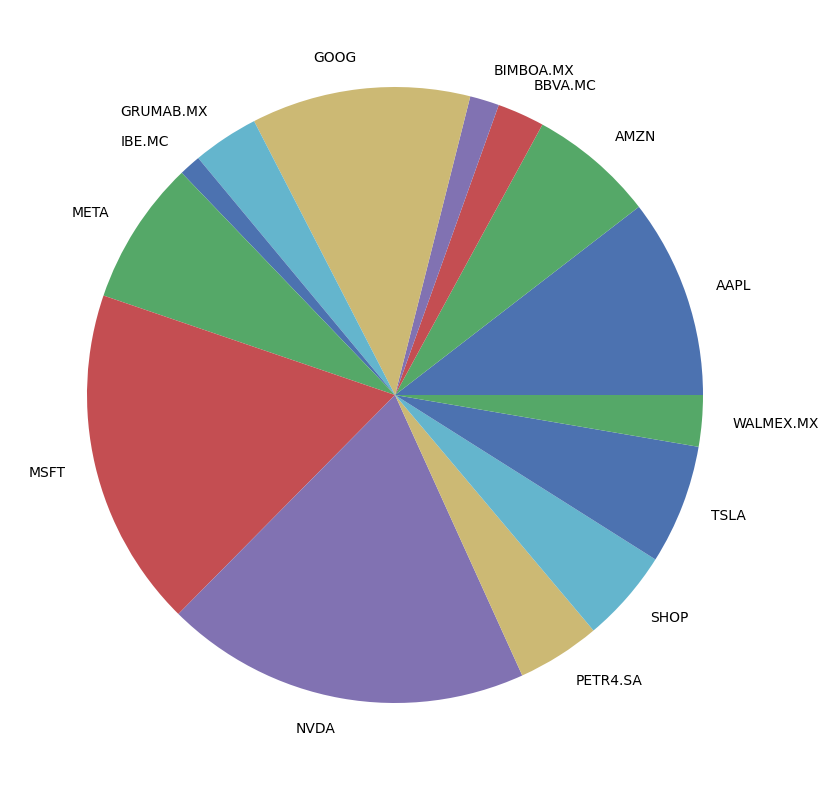

In [67]:
# Pormedio de un grafico de pastel se observa los pesos para cada activo del porfolio optimo 

pd.Series(weights1).plot.pie(figsize=(10,10));

In [68]:
# se calcula los parametros para calcular posteriormente el portafolio de minima varianza 

ef = EfficientFrontier(ret_bl, S_bl)

# Encontrar el portafolio de mínima varianza
weights_min_vol = ef.min_volatility()
ret_min_vol, vol_min_vol, _ = ef.portfolio_performance()

In [69]:
# Se calcula la frontera eficiente para el grafico 

ef = EfficientFrontier(ret_bl, S_bl)
ef.max_sharpe(risk_free_rate = 0.04357)
weights = ef.clean_weights()
rendimiento_esperado, volatilidad, razon_sharpe = ef.portfolio_performance(verbose=True)
weights

Expected annual return: 22.5%
Annual volatility: 23.0%
Sharpe Ratio: 0.79


c:\Users\Alvaro\AppData\Local\Programs\Python\Python311\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


OrderedDict([('AAPL', 0.0),
             ('AMZN', 0.0),
             ('BBVA.MC', 0.0),
             ('BIMBOA.MX', 0.0),
             ('GOOG', 0.1446),
             ('GRUMAB.MX', 0.0),
             ('IBE.MC', 0.0),
             ('META', 0.0),
             ('MSFT', 0.74926),
             ('NVDA', 0.06909),
             ('PETR4.SA', 0.03706),
             ('SHOP', 0.0),
             ('TSLA', 0.0),
             ('WALMEX.MX', 0.0)])

c:\Users\Alvaro\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_9280\246579660.py:49: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


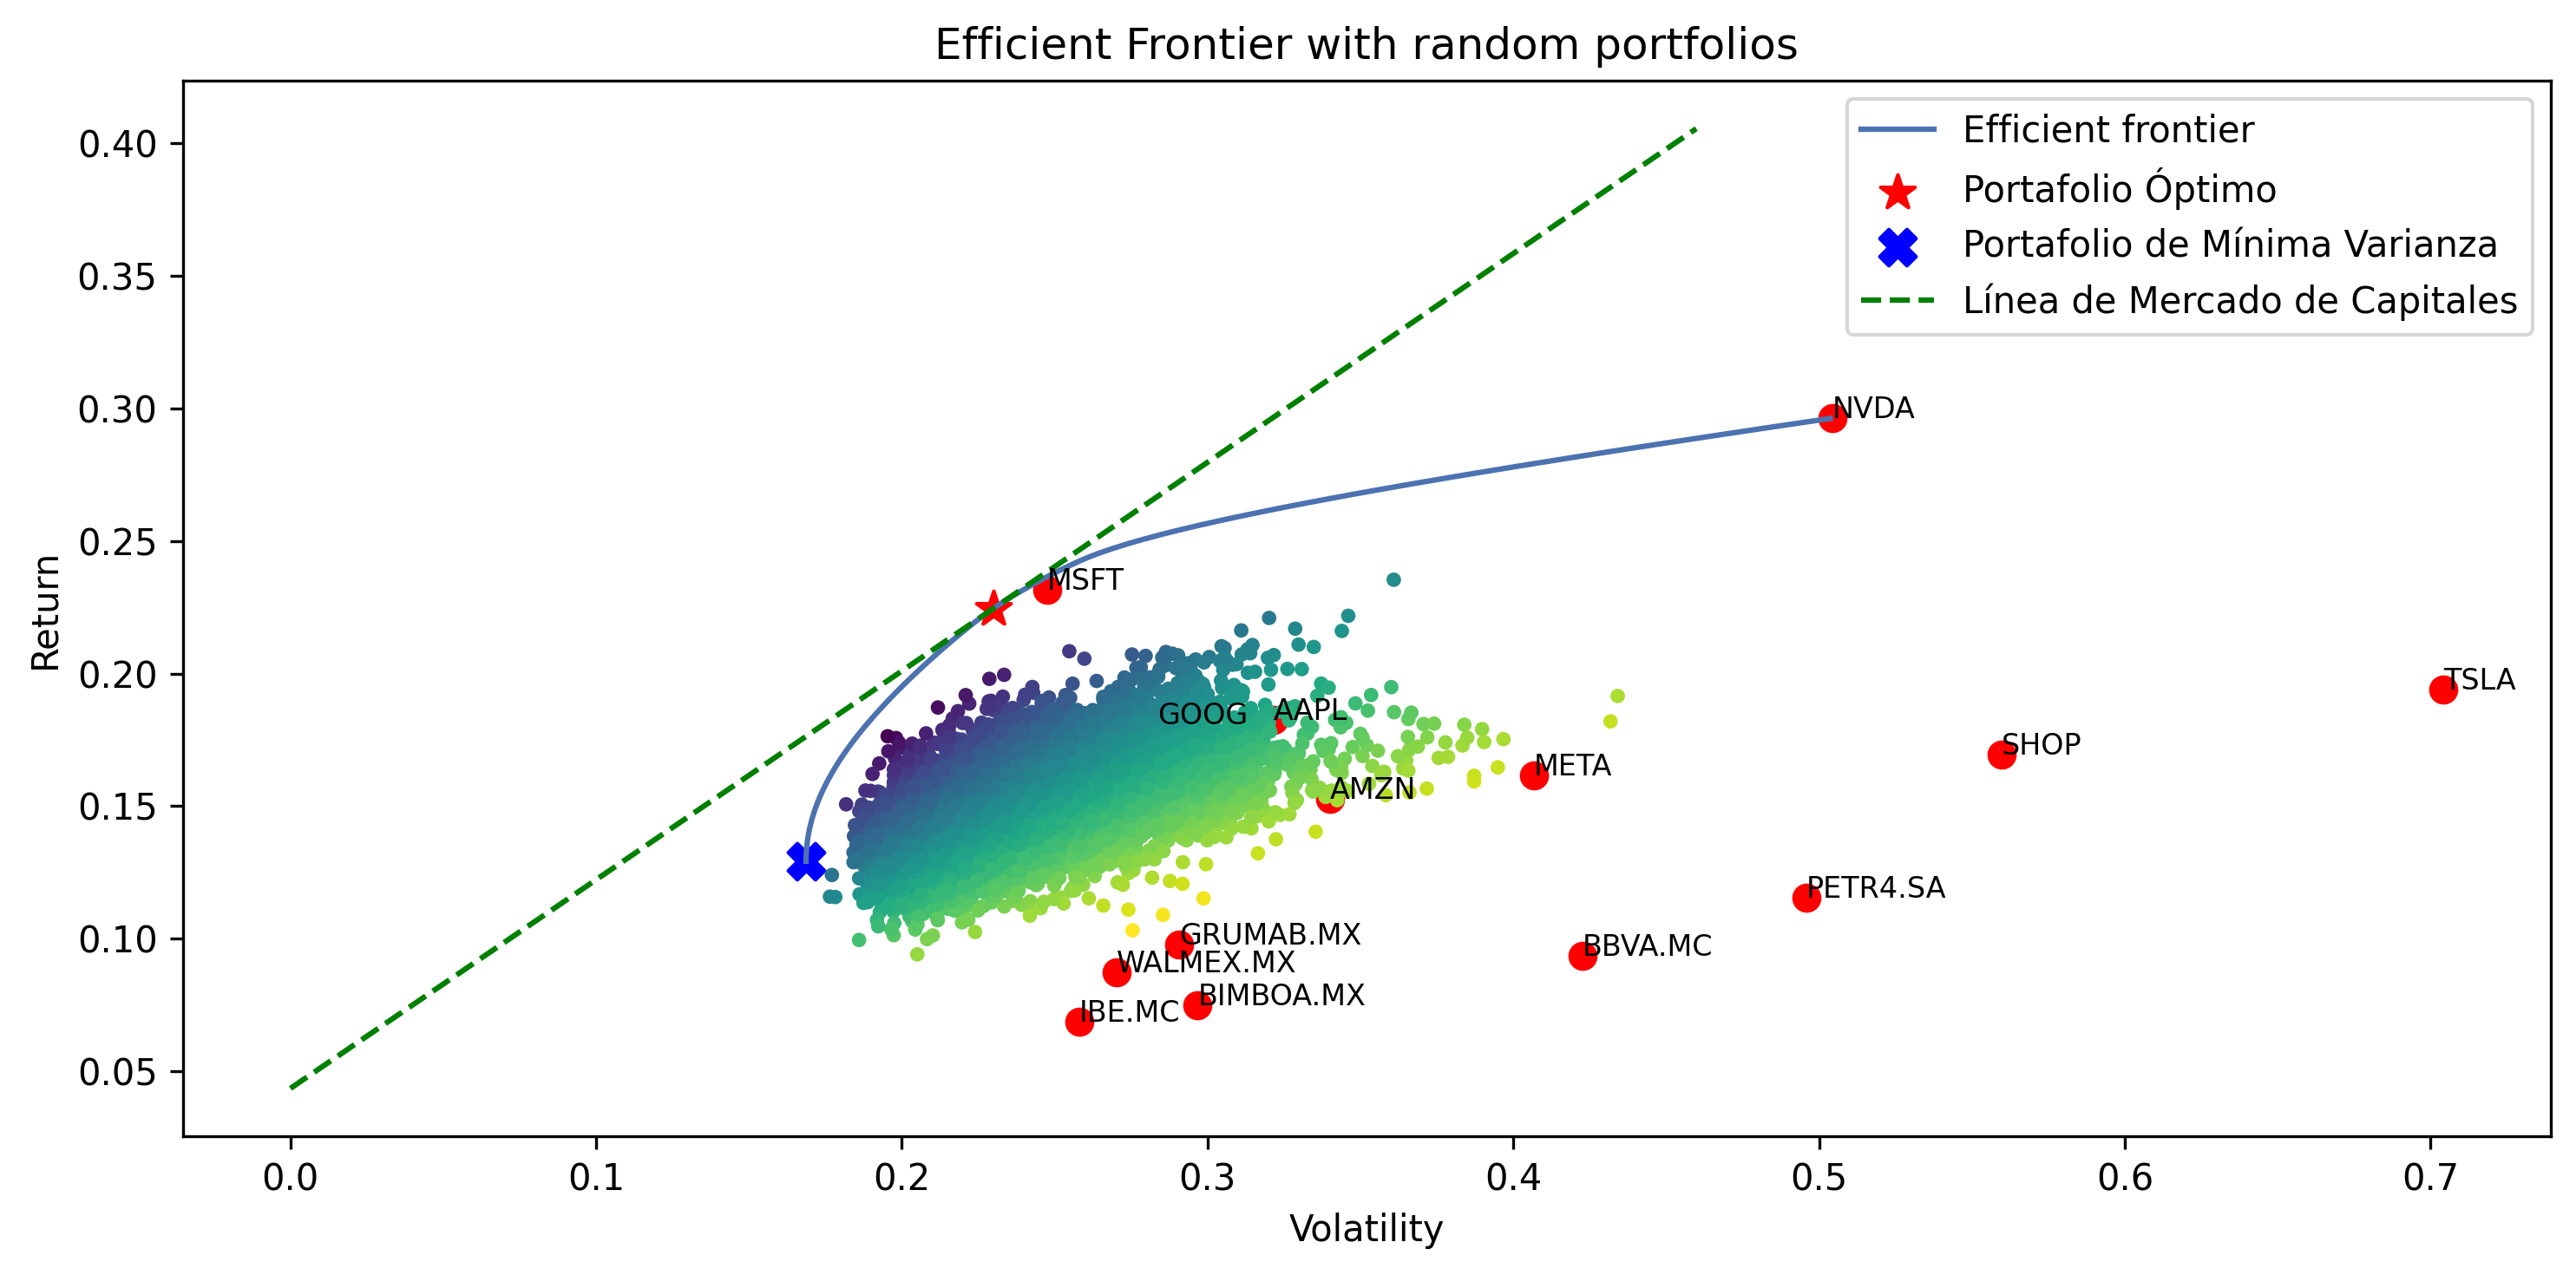

In [70]:
ef = EfficientFrontier(ret_bl, S_bl)

tasa_libre_riesgo = 0.04357

# Función para calcular la CML
def capital_market_line(tasa_libre_riesgo):
    slope = (rendimiento_esperado - tasa_libre_riesgo) / (volatilidad - 0)  # Pendiente de la CML
    return lambda x: tasa_libre_riesgo + slope * x

# Graficar la frontera eficiente
fig, ejes = plt.subplots(figsize=(10, 5), dpi=300)
plotting.plot_efficient_frontier(ef, ax=ejes, show_assets=False)

# Marcar el portafolio óptimo
ejes.scatter(volatilidad, rendimiento_esperado, marker='*', color='red', s=100, label='Portafolio Óptimo')

# Marcar el portafolio de mínima varianza
ejes.scatter(vol_min_vol, ret_min_vol, marker='X', color='blue', s=100, label='Portafolio de Mínima Varianza')

for activo, peso in weights1.items():
    # Calcula la volatilidad y el retorno esperado del activo
    if peso > 0:
        volatilidad_activo = S_bl.loc[activo, activo] ** 0.5
        retorno_esperado_activo = ret_bl[activo]

        # Marca el activo en el gráfico
        ejes.scatter(volatilidad_activo, retorno_esperado_activo, color='red', s=50)  # Marca el punto en la gráfica
        ejes.annotate(activo, 
                      (volatilidad_activo, retorno_esperado_activo), 
                      color='black', 
                      fontsize=8)  # Anota solo si el peso es mayor a 0

# Graficar la CML
cml = capital_market_line(tasa_libre_riesgo)
x = np.linspace(0, volatilidad * 2, 100)  # Ajuste en el rango de x para evitar el error
ejes.plot(x, cml(x), color="green", linestyle="--", label="Línea de Mercado de Capitales")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ejes.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ejes.set_title("Efficient Frontier with random portfolios")
ejes.legend()
plt.tight_layout()
plt.show()

In [71]:
S_bl

Ticker,AAPL,AMZN,BBVA.MC,BIMBOA.MX,GOOG,GRUMAB.MX,IBE.MC,META,MSFT,NVDA,PETR4.SA,SHOP,TSLA,WALMEX.MX
Ticker,,,,,,,,,,,,,,
AAPL,0.103435,0.057283,0.013165,0.021012,0.035178,0.027192,0.016939,0.044750,0.038673,0.083321,0.044390,0.078574,0.121510,0.021106
AMZN,0.057283,0.115629,0.011876,0.016420,0.046597,0.030153,0.010633,0.059160,0.042331,0.093603,0.026176,0.101586,0.106207,0.022138
BBVA.MC,0.013165,0.011876,0.178605,0.051276,0.027573,0.039651,0.034642,0.036566,0.018681,0.031879,0.071662,0.067600,0.042867,0.043233
BIMBOA.MX,0.021012,0.016420,0.051276,0.088066,0.016770,0.029081,0.018503,0.014427,0.014113,0.018278,0.020878,0.045160,0.026071,0.033885
GOOG,0.035178,0.046597,0.027573,0.016770,0.080374,0.024505,0.012445,0.041578,0.031015,0.063855,0.023759,0.073226,0.068387,0.027320
GRUMAB.MX,0.027192,0.030153,0.039651,0.029081,0.024505,0.084514,0.022005,0.020819,0.016346,0.029469,0.038227,0.054350,0.040440,0.026819
IBE.MC,0.016939,0.010633,0.034642,0.018503,0.012445,0.022005,0.066622,0.014415,0.016310,0.015199,0.008173,0.040174,0.033367,0.016399
META,0.044750,0.059160,0.036566,0.014427,0.041578,0.020819,0.014415,0.165364,0.039820,0.097007,0.028462,0.088089,0.075769,0.012637
MSFT,0.038673,0.042331,0.018681,0.014113,0.031015,0.016346,0.016310,0.039820,0.061306,0.061233,0.008426,0.069453,0.061462,0.015482
